#ML_SOM_Anomalías

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar el algoritmo de SOM a un conjunto de datos para descubrir fraudes en las aplicaciones para obtener tarjetas de crédito. </p>

El desafío aquí consiste en detectar fraudes potenciales en las aplicaciones que hicieron los clientes para obtener una tarjeta de crédito. Los clientes han llenado un formulario con información para aplicar a una tarjeta de de crédito avanzada. El banco ya ha decidido si la otorga o no. Se creará un modelo utilizando la técnica de SOM y se obtendrá información sobre los clientes que solicitan una tarjeta de crédito avanzada. Con esta técnica se pueden detectar anomalías en clientes que ya les fue aceptada la tarjeta pero que tienen un comportamiento anormal en la información de su formulario.

##Cargar y preparar los datos

Para este ejercicio se estará utilizando un conjunto de datos que contiene la información proporcionada por los clientes al completar el formulario de solicitud para obtener una tarjeta de crédito.

<ul>
  <li>datos: <a href="https://www.dropbox.com/s/koq0s4jvlx5fq6e/Credit_Card_Applications.csv?dl=0" target="_blank">https://www.dropbox.com/s/koq0s4jvlx5fq6e/Credit_Card_Applications.csv?dl=0</a></li>
  <li>para utilizar con python: <a href="https://www.dropbox.com/s/koq0s4jvlx5fq6e/Credit_Card_Applications.csv?dl=1" target="_blank">https://www.dropbox.com/s/koq0s4jvlx5fq6e/Credit_Card_Applications.csv?dl=1</a></li>
  <li>descripción de los datos: <a href="https://www.dropbox.com/s/265kff8rbgyut3s/DataSetInformation.txt?dl=0" target="_blank">https://www.dropbox.com/s/265kff8rbgyut3s/DataSetInformation.txt?dl=0</a></li>
  <li>tipo de datos: csv</li>
  <li>Todos los datos han sido anonimizados para no descubrir la identidad de los clientes</li>
</ul>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Se cargan los datos y se muestra el resultado:

In [0]:
# Importar librerias requeridas
import pandas as pd
import numpy as np

# Leer datos desde archivo CSV
csv_path = "https://www.dropbox.com/s/koq0s4jvlx5fq6e/Credit_Card_Applications.csv?dl=1"
df = pd.read_csv(csv_path,sep=",")
df.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [0]:
df.shape

Out[9]: (690, 16)

<p>Ahora se divide el conjunto de datos en variables dependientes e independientes. Las variables independientes son del atributo CustomerID al atributo A14, y se les llama <b>ind_var</b> y la variable dependiente es el último atributo que se llamará <b>dep_var</b>.</p>
<p>Las variables se guardarán como arreglos Numpy porque eso es lo que recibe el algoritmo SOM que se utilizará posteriormente.</p>
<p>Se construirá el modelo de SOM, que es aprendizaje no supervisado, por lo que se estará trabajando con las variables independientes.</p>

In [0]:
ind_var = df.iloc[: ,:-1].values    # variables independientes
dep_var = df.iloc[: , -1].values    # variables dependientes

Para aplicar el algoritmo de SOM es importante tener los datos normalizados. Si se observan los datos algunos atributos tienen valores numéricos altos y otros muy pequeños. Es importante normalizar para obtener buenos resultados. Para ellos se va a utilizar la función <b>MinMaxScaler</b> de ScikitLearn:

In [0]:
# Normalizando los atributos
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
ind_var = sc.fit_transform(ind_var)

##Construyendo el modelo y aplicando el algoritmo SOM

Existen varias implementaciones de SOM en Python. Para este ejemplo se va a utilizar la librería <b>MINISON</b>:

<p>Databricks no trae esa librería por defecto por lo que es necesario instalarla con el comando <b>PIP</b>. El comando PIP permite instalar librerías que no vengan por defecto en el ambiente de desarrollo:</p>

In [0]:
%sh
pip install minisom

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


<p>Importe las librerías necesarias para aplicar el algoritmo y visualizar los resultados.</p>
<p>La función <b>MiniSom</b> recibe los siguientes parámetros:</p>
<ul>
  <li>el tamaño del som: se utiliza una red de 10x10</li>
  <li>input_len: la cantidad de columnas: son 15 columnas en el conjunto de datos</li>
  <li>sigma: el radio para la vecindad, se utiliza un valor de 1.0</li>
  <li>learning_rate: la tasa de aprendizaje para ajustar los pesos, se utiliza un valor de 0.5</li>
  <li>Finalmente se realizan 1000 iteraciones sobre los datos. Se puede utilizar una de las dos opciones de entrenamiento que brinda esta implementación: train_batch o train_random. El primero usa muestras en el orden en el que se registran en el conjunto de datos, mientras que el segundo selecciona aleatoriamente las muestras.</li>
<ul>

In [0]:
#importar el modelo SOM
from minisom import MiniSom
# inicializar el modelo
som = MiniSom( x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# inicializar los pesos
som.random_weights_init(ind_var)
# entrenar el modelo
som.train_random(data = ind_var, num_iteration = 1000)

##Visualizando los resultados

En este paso, se construye un mapa del SOM. En primer lugar se importa la biblioteca pylab que se utiliza para la visualización de los resultados y se importan diferentes paquetes.
<ul>
  <li>La función bone () en el módulo pyplot de la biblioteca matplotlib se utiliza para establecer el mapa de colores en "bone".</li>
  <li>En la línea 7 <b>pcolor(som.distance_map().T)</b> obtiene la media de todos los nodos ganadores.</li>
  <li>En la línea 8 <b>colorbar()</b> se hace una barra de colores que estará entre 0 y 1.</li>
  <li>En la línea 9 y 10 se especifican marcadores (circulos y cuadrados) y colores (rojo y verde). Circulo rojo, el banco NO acepto la solicitud de la tarjeta, y el Cuadrado Verde, que SI aceptó</li>
  <li>En la línea 11 -19 el ciclo asigna colores de la paleta bone a los nodos ganadores. Los recuadros blancos corresponden a los nodos para los que la distancia media entre neuronas es grande y los recuadros negros corresponden a los nodos para los que la distancia media entre neuronas es pequeña.</li>
  <li>Aquellos nodos entre los cuales la distancia entre neuronas es mínima se ubicarán en un cluster (nodos negros) y aquellos para los cuales la distancia entre neuronas es grande, estarán como valores atípicos (nodos blancos).</li>
<ul>

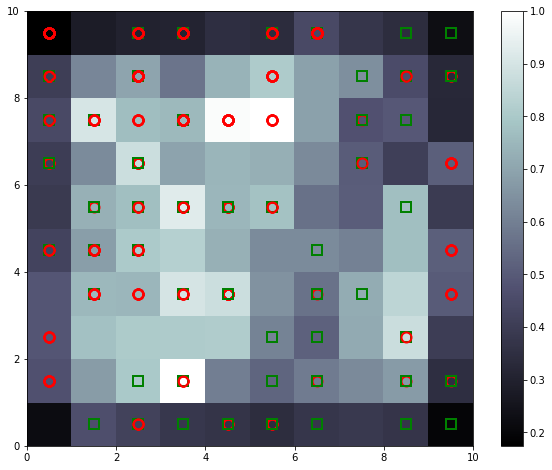

In [0]:
# Visualizando los resultados
# Los puntos anómalos son los clientes fraudulentos que tienen un comportamiento diferente
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize=((10,8)))
bone()
pcolor(som.distance_map().T) #este valor lo utiliza colorbar
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(ind_var):
    w = som.winner(x)  #devuelve la neurona ganadora para cada cliente
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[dep_var[i]],
         markeredgecolor = colors[dep_var[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

En el mapa anterior el círculo rojo significa que el cliente no obtuvo la aprobación (estos casos no preocupan tanto, porque el banco logró identificar problemas en la aplicación) y el cuadrado verde significa que el cliente obtuvo la aprobación (estos son los que preocupan). Si se observa en el mapa los valor atípicos son aquellos recuadros verdes que aparecen en áreas blancas, el área de color blanco es un fraude de alto potencial porque son las neuronas que tienen distancias grandes, que no cayeron en ningún cluster.

##Identificando los potenciales fraudes

En este paso se detectan aquellos clientes que pueden haber hecho trampa en su aplicación, tomando como base el mapa de colores visto previamente. Se utiliza la función de concatenar para obtener los valores en una lista:
<ul>
  <li>Identifique los recuadros verdes que quedaron en cuadrados blancos.</li>
  <li>Sustituya los valores en el código de acuerdo a los resultados de su mapa</li>
  <li>Ejemplo, si hay un cuadrado verde en un cuadrado blanco en la posición X=3, Y=6 entonces debe poner en el código mappings[(3,6)]</li>
  <li>Identifique dos nodos fraudulentos potenciales</li>
  <li>En la variable <b>frauds</b> quedan los clientes que hayan sido asignados a esos nodos</li>
<ul>

In [0]:
# se obtienen los nodos que resultaron ganadores
mappings = som.win_map(ind_var)
#filtre los que desea visualizar para una sola neurona o varias
frauds = mappings[(3,1)]
#frauds = np.concatenate((mappings[(3,7)], mappings[(5,6)]), axis=0)
#frauds = np.concatenate((mappings[(4,6)], mappings[(9,5)], mappings[(5,5)]), axis=0)

Para encontrar los identificadores de los clientes que son potencialmente fraudulentos debemos revertir la normalización para lo cual se se utiliza la función <b>inverse_transforms</b>. Luego se convierte el arreglo numpy a dataframe para poder unirlo con el dataframe original. Finalmente se filtra por la <b>Class=1</b> que son aquellos casos que fueron encontrados como anomalías y tambien fueron aprobados y son los que deben pasar algún proceso de revisión:

In [0]:
# reescalar los valores
frauds = sc.inverse_transform(frauds)
# convertir a dataframe
dataframe = pd.DataFrame(frauds, columns = ['CustomerID','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14'])
# Unir con df original para ver las clases
final_frauds = pd.merge(dataframe, df[["CustomerID","Class"]], left_on='CustomerID', right_on='CustomerID', how='left')
# filtrar solo los potenciales fraudes
final_frauds.query('Class == 1', inplace = True)
final_frauds.head(100)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
1,15684512.0,1.0,42.50,4.915,1.0,9.0,4.0,3.165,1.0,0.0,0.0,1.0,2.0,52.0,1443.0,1
2,15678210.0,1.0,42.17,5.040,2.0,11.0,8.0,12.750,1.0,0.0,0.0,1.0,2.0,92.0,1.0,1
3,15664615.0,1.0,33.17,1.040,2.0,12.0,8.0,6.500,1.0,0.0,0.0,1.0,2.0,164.0,31286.0,1
5,15716276.0,1.0,34.25,3.000,2.0,13.0,8.0,7.415,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1
7,15591107.0,1.0,32.00,1.750,1.0,10.0,8.0,0.040,1.0,0.0,0.0,1.0,2.0,393.0,1.0,1


¿Qué pasaría si no tuvieramos las clases en el set de datos? ¿Si el banco quisiera que le dieramos una propuesta de posibles aplicaciones fraudulentas?

Out[27]: <matplotlib.colorbar.Colorbar at 0x7f2446210640>

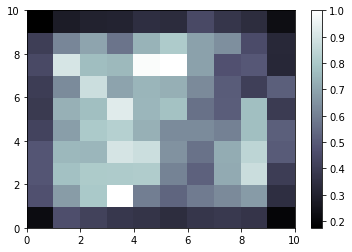

In [0]:
pcolor(som.distance_map().T)
colorbar()

Haz doble clic <b>aquí</b> para ver la respuesta a la pregunta.

<!-- Posible respuesta:

Debemos observar los cuadrados blancos en la matriz, donde NO se formaron clusters, recoger esos ejemplos y pasarlos al banco

-->

Links interesantes:
<ul>
        <li>MINISOM - https://github.com/JustGlowing/minisom</li>
<ul>